# Proyecto Dirty cafe 
## limpieza de datos

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
CafeSales = pd.read_csv("dirty_cafe_sales.csv")


### Cambiar formato de los objetos del DataFrame

In [5]:
CafeSales.dtypes

Transaction ID      object
Item                object
Quantity            object
Price Per Unit      object
Total Spent         object
Payment Method      object
Location            object
Transaction Date    object
dtype: object

In [6]:
CafeSales

,Transaction ID,Item,Quantity,Price Per Unit,Total Spent,Payment Method,Location,Transaction Date
0,TXN_1961373,Coffee,2,2.0,4.0,Credit Card,Takeaway,2023-09-08
1,TXN_4977031,Cake,4,3.0,12.0,Cash,In-store,2023-05-16
2,TXN_4271903,Cookie,4,1.0,ERROR,Credit Card,In-store,2023-07-19
3,TXN_7034554,Salad,2,5.0,10.0,UNKNOWN,UNKNOWN,2023-04-27
4,TXN_3160411,Coffee,2,2.0,4.0,Digital Wallet,In-store,2023-06-11
...,...,...,...,...,...,...,...,...
9995,TXN_7672686,Coffee,2,2.0,4.0,NaN,UNKNOWN,2023-08-30
9996,TXN_9659401,NaN,3,NaN,3.0,Digital Wallet,NaN,2023-06-02
9997,TXN_5255387,Coffee,4,2.0,8.0,Digital Wallet,NaN,2023-03-02
9998,TXN_7695629,Cookie,3,NaN,3.0,Digital Wallet,NaN,2023-12-02


In [7]:
CafeSales["Quantity"] = pd.to_numeric(CafeSales["Quantity"], errors="coerce").fillna(0).astype(int)
CafeSales["Price Per Unit"] = pd.to_numeric(CafeSales["Price Per Unit"], errors="coerce").fillna(0).astype(float)
CafeSales["Total Spent"] = pd.to_numeric(CafeSales["Total Spent"], errors="coerce").fillna(0).astype(float)




In [8]:
CafeSales["Transaction Date"] = pd.to_datetime(CafeSales["Transaction Date"], errors="coerce", format = "%Y-%m-%d")

In [9]:
CafeSales.dtypes

Transaction ID              object
Item                        object
Quantity                     int32
Price Per Unit             float64
Total Spent                float64
Payment Method              object
Location                    object
Transaction Date    datetime64[ns]
dtype: object

In [10]:
CafeSales

,Transaction ID,Item,Quantity,Price Per Unit,Total Spent,Payment Method,Location,Transaction Date
0,TXN_1961373,Coffee,2,2.0,4.0,Credit Card,Takeaway,2023-09-08
1,TXN_4977031,Cake,4,3.0,12.0,Cash,In-store,2023-05-16
2,TXN_4271903,Cookie,4,1.0,0.0,Credit Card,In-store,2023-07-19
3,TXN_7034554,Salad,2,5.0,10.0,UNKNOWN,UNKNOWN,2023-04-27
4,TXN_3160411,Coffee,2,2.0,4.0,Digital Wallet,In-store,2023-06-11
...,...,...,...,...,...,...,...,...
9995,TXN_7672686,Coffee,2,2.0,4.0,NaN,UNKNOWN,2023-08-30
9996,TXN_9659401,NaN,3,0.0,3.0,Digital Wallet,NaN,2023-06-02
9997,TXN_5255387,Coffee,4,2.0,8.0,Digital Wallet,NaN,2023-03-02
9998,TXN_7695629,Cookie,3,0.0,3.0,Digital Wallet,NaN,2023-12-02


### Completar Valores Nulos

#### Valores str

In [13]:
CafeSales["Location"].unique()

array(['Takeaway', 'In-store', 'UNKNOWN', nan, 'ERROR'], dtype=object)

In [14]:
CafeSales["Item"] = CafeSales["Item"].replace(["UNKNOWN", "nan", "ERROR"], np.nan)

In [15]:
moda = CafeSales["Item"].mode()[0]
CafeSales["Item"] = CafeSales["Item"].fillna(moda)

In [16]:
CafeSales["Payment Method"] = CafeSales["Payment Method"].replace(["UNKNOWN", "nan", "ERROR"], np.nan)

In [17]:
moda1 = CafeSales["Payment Method"].mode()[0]
CafeSales["Payment Method"] = CafeSales["Payment Method"].fillna("otro")

In [18]:
CafeSales["Location"] = CafeSales["Location"].replace(["nan", "ERROR","UNKNOWN"], np.nan)

In [19]:
CafeSales["Location"] = CafeSales["Location"].fillna("otro")

#### Valores Numericos

In [21]:
CafeSales["Location"] = CafeSales["Location"].str.lower()

In [22]:
CafeSales["Quantity"] = CafeSales["Quantity"].replace(0, np.nan)

In [23]:
CafeSales["Price Per Unit"] = CafeSales["Price Per Unit"].replace(0, np.nan)
CafeSales["Total Spent"] = CafeSales["Total Spent"].replace(0, np.nan)

In [24]:
media = CafeSales["Quantity"].mean()
CafeSales["Quantity"] = CafeSales["Quantity"].fillna(media)  

In [25]:
CafeSales["Quantity"] = CafeSales["Quantity"].round(0)

In [26]:
CafeSales["Quantity"] = CafeSales["Quantity"].astype(int)

In [27]:
moda2 = CafeSales["Price Per Unit"].mode()[0]
CafeSales["Price Per Unit"] = CafeSales["Price Per Unit"].fillna(moda2) 

In [28]:
PrecioUnidad = CafeSales["Quantity"] * CafeSales["Price Per Unit"]
CafeSales["Total Spent"] = CafeSales["Total Spent"].fillna(PrecioUnidad)

In [29]:
CafeSales =CafeSales.drop(
    labels = ["Transaction ID"],
    axis = "columns" 
)

In [30]:
CafeSales["Transaction Date"] = CafeSales["Transaction Date"].ffill()


In [31]:
CafeSales["Transaction Month"] = CafeSales["Transaction Date"].dt.to_period("M").dt.to_timestamp()

In [32]:
CafeSales["Transaction Date"] = pd.to_datetime(CafeSales["Transaction Date"])
CafeSales["DíaSemana"] = CafeSales["Transaction Date"].dt.day_name()

In [33]:
CafeSales

,Item,Quantity,Price Per Unit,Total Spent,Payment Method,Location,Transaction Date,Transaction Month,DíaSemana
0,Coffee,2,2.0,4.0,Credit Card,takeaway,2023-09-08,2023-09-01,Friday
1,Cake,4,3.0,12.0,Cash,in-store,2023-05-16,2023-05-01,Tuesday
2,Cookie,4,1.0,4.0,Credit Card,in-store,2023-07-19,2023-07-01,Wednesday
3,Salad,2,5.0,10.0,otro,otro,2023-04-27,2023-04-01,Thursday
4,Coffee,2,2.0,4.0,Digital Wallet,in-store,2023-06-11,2023-06-01,Sunday
...,...,...,...,...,...,...,...,...,...
9995,Coffee,2,2.0,4.0,otro,otro,2023-08-30,2023-08-01,Wednesday
9996,Juice,3,3.0,3.0,Digital Wallet,otro,2023-06-02,2023-06-01,Friday
9997,Coffee,4,2.0,8.0,Digital Wallet,otro,2023-03-02,2023-03-01,Thursday
9998,Cookie,3,3.0,3.0,Digital Wallet,otro,2023-12-02,2023-12-01,Saturday


In [34]:
CafeSales.dtypes

Item                         object
Quantity                      int32
Price Per Unit              float64
Total Spent                 float64
Payment Method               object
Location                     object
Transaction Date     datetime64[ns]
Transaction Month    datetime64[ns]
DíaSemana                    object
dtype: object

In [35]:
CafeSales.to_csv("CafeSales_limpio.csv", index=False, encoding="utf-8")

## Analisis Exploratorio

### Analisis de los Productos

¿Cuáles son los productos más vendidos?

In [39]:
CafeSales = pd.read_csv("CafeSales_limpio.csv", parse_dates=["Transaction Date", "Transaction Month"])

In [40]:
CafeSales.dtypes

Item                         object
Quantity                      int64
Price Per Unit              float64
Total Spent                 float64
Payment Method               object
Location                     object
Transaction Date     datetime64[ns]
Transaction Month    datetime64[ns]
DíaSemana                    object
dtype: object

In [41]:
Producto_Mas_Vendido = CafeSales.groupby(["Item"]).agg({
    "Quantity" : "sum",
}).reset_index().head(5)

In [42]:
Producto_Mas_Vendido.sort_values(by = "Quantity", ascending = False)

,Item,Quantity
3,Juice,6435
1,Coffee,3551
4,Salad,3469
0,Cake,3467
2,Cookie,3249


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_14504\3947641295.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


Text(0.5, 1.0, 'unidades Vendidas')

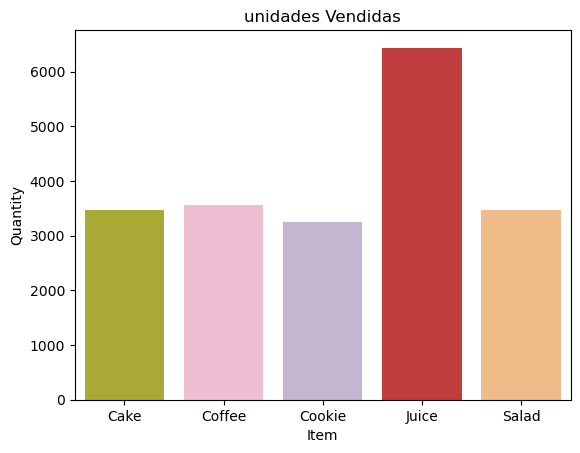

In [43]:
sns.barplot(
    data = Producto_Mas_Vendido,
    y = "Quantity",
    x = "Item",
    palette = "tab20_r"
) 
plt.title("unidades Vendidas")

Se puede apreciar una gran diferencia entre cuales son los productos mas vendidos, de un total de 8 productos que se venden han vendido en el cafe durante el año 2023 
el que tiene una mayoria es "Juice" con 6435 unidades, el resto de productos van en un rango de ventas de entre "3249" a "3551" con una diferencia poco notable, siendo "Coffe"  "Salad"
el segundo y el tercero mas vendido respectivamente.El total de unidades vendidas en 2023 fue de 30270 unidades.

¿Qué productos generan mayor ingreso?

In [46]:
MayorIngreso = CafeSales.groupby("Item").agg({
    "Total Spent" : "sum"
}).reset_index().head(5)

In [47]:
MayorIngreso.sort_values(by = "Total Spent", ascending = False)

,Item,Total Spent
3,Juice,19079.5
4,Salad,17365.0
0,Cake,10413.0
1,Coffee,7107.0
2,Cookie,3256.0


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_14504\1075440953.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


Text(0.5, 1.0, 'Rentablidad por Producto')

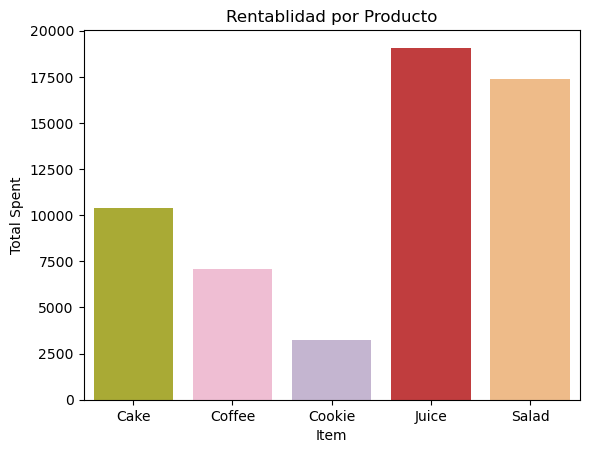

In [48]:
sns.barplot(
    data = MayorIngreso,
    y = "Total Spent",
    x = "Item",
    palette = "tab20_r"
) 
plt.title("Rentablidad por Producto")



C:\Users\Lenovo\AppData\Local\Temp\ipykernel_14504\1902290230.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_14504\1902290230.py:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45)
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_14504\1902290230.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_14504\1902290230.py:21: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_xtick

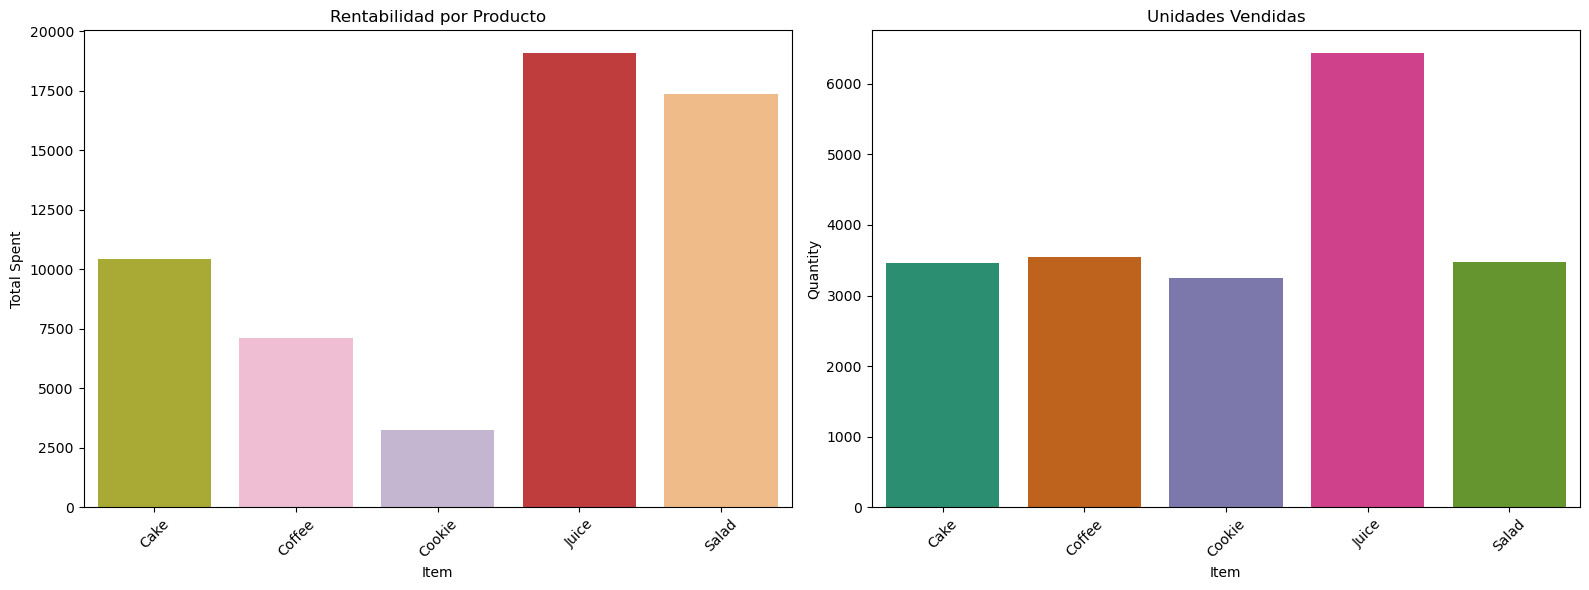

In [49]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

sns.barplot(
    data=MayorIngreso,
    y="Total Spent",
    x="Item",
    palette="tab20_r",
    ax=ax1
)
ax1.set_title("Rentabilidad por Producto")
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45)

sns.barplot(
    data=Producto_Mas_Vendido,
    y="Quantity",
    x="Item",
    palette="Dark2",
    ax=ax2
)
ax2.set_title("Unidades Vendidas")
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=45)

plt.tight_layout()
plt.show()

In [50]:
MayorIngreso = CafeSales.groupby("Item").agg({
    "Total Spent" : "sum",
    "Price Per Unit" : "mean"
}).reset_index().head(5)

total_general = MayorIngreso["Total Spent"].sum()
MayorIngreso["% del Total"] = (MayorIngreso["Total Spent"] / total_general) * 100
MayorIngreso["% del Total"] = MayorIngreso["% del Total"].round(2)
MayorIngreso = MayorIngreso.sort_values(by="Total Spent", ascending=False).head(5)

In [51]:
MayorIngreso

,Item,Total Spent,Price Per Unit,% del Total
3,Juice,19079.5,2.971495,33.34
4,Salad,17365.0,4.885017,30.35
0,Cake,10413.0,3.000000,18.20
1,Coffee,7107.0,2.048927,12.42
2,Cookie,3256.0,1.120879,5.69


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_14504\2013454239.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


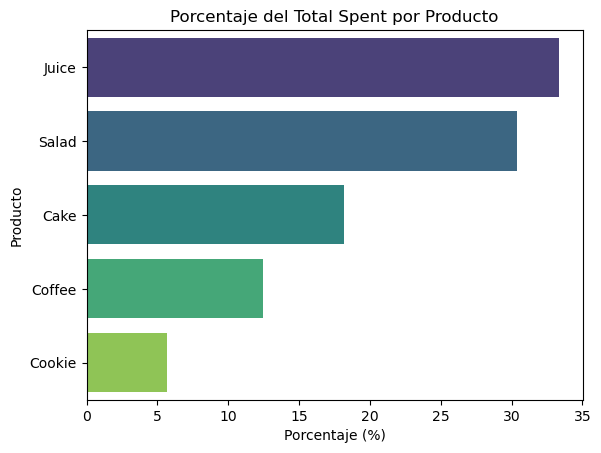

In [52]:
sns.barplot(
    data=MayorIngreso,
    x="% del Total",
    y="Item",
    palette="viridis"
)
plt.title("Porcentaje del Total Spent por Producto")
plt.xlabel("Porcentaje (%)")
plt.ylabel("Producto")
plt.show()

Cuando analizamos la rentabilidad por producto, observamos que el ítem "Juice" es el que más ingresos genera, con un total de €19,079.50. Sin embargo, le sigue muy de cerca "Salad", con una rentabilidad total de €17,365.00, lo que representa una diferencia de tan solo €1,714.50.
Al comparar la rentabilidad con las unidades vendidas, se destaca que "Juice" se vende en una cantidad significativamente mayor que "Salad", pero ambas mantienen un nivel de rentabilidad similar. Esto puede atribuirse a la diferencia de precio por unidad: mientras que "Juice" tiene un precio promedio cercano a €3.00, "Salad" se sitúa en torno a €4.88.
Esto abre la puerta a posibles estrategias comerciales:
Se podría considerar un ligero aumento del precio de "Juice" aprovechando su alta demanda.
A su vez, sería interesante ajustar el precio de "Salad" a la baja para incentivar un mayor volumen de ventas y así incrementar su rentabilidad general.
Por otro lado, el producto "Cookie" presenta una rentabilidad considerablemente baja (€3,256.00), a pesar de registrar un volumen de ventas relativamente comparable con otros ítems. Esto se debe a su bajo precio promedio de €1.12, lo que limita su margen de beneficio. En este caso, podría evaluarse si conviene:
Aumentar su precio ligeramente.
O incluso replantear su continuidad en el catálogo si no ofrece valor estratégico para el negocio.
Vemos que el 63,69% de la rentabilidad viene de los productos "juice" y "Salad" por lo que se recomienda el negocio se centre en ellas, sacando variedades y promociones para estos productos.

### Temporalidad

¿En qué días de la semana se produce mayor volumen de ventas?

In [56]:
CafeSales["DíaSemana"] = CafeSales["Transaction Date"].dt.day_name()

VentasPorDia = CafeSales.groupby("DíaSemana").agg({
    "Quantity": "sum",
    "Total Spent": "sum"
}).reset_index()

In [57]:
VentasPorDia.head(7)

,DíaSemana,Quantity,Total Spent
0,Friday,4386,12859.5
1,Monday,4382,12868.5
2,Saturday,4335,12811.5
3,Sunday,4365,12811.0
4,Thursday,4348,12938.5
5,Tuesday,4273,12729.0
6,Wednesday,4182,12289.5


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_14504\1620224295.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


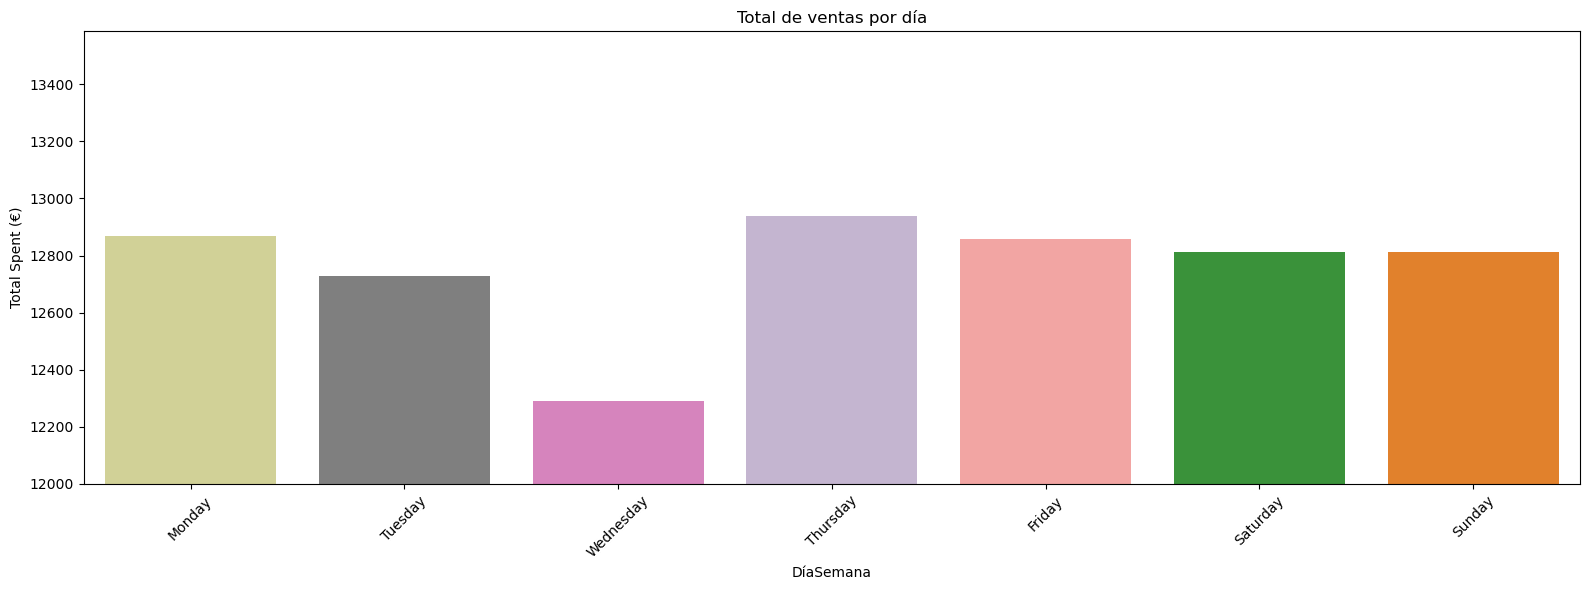

In [58]:
orden_dias = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]

VentasPorDia["DíaSemana"] = pd.Categorical(
    VentasPorDia["DíaSemana"],
    categories=orden_dias,
    ordered=True
)

VentasPorDia = VentasPorDia.sort_values("DíaSemana")

plt.figure(figsize=(16, 6))
sns.barplot(
    data=VentasPorDia,
    x="DíaSemana",
    y="Total Spent",
    palette="tab20_r"
)
plt.title("Total de ventas por día")
plt.ylabel("Total Spent (€)")
plt.ylim(12000)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

En el siguiente grafico pomdemos ver un incremento de ventas total los fines de semana siendo el dia que mas se factura el Jueves y siendo el dia que menos se factura los miercoles, posiblemente se deba a que es el inicio del fin de semana y mucha gente ya no trabaje el finde, los productos que mas se venden son Juice, Salad y Sandwich respectivamente, podemos ver que hay un aumento de ventas del producto Juice los lunes, seguramente si mirasemos las horas seria por la mañana dado a los desayunos, el dia que menos Juice se vende es el martes, los sandwiches en cambio se venden mejor desde el sabado hasta el martes, teniendo un gran desnivel en el resto de la semana, se podrian hacer ofertas focalizadas esos dias para incentivar el consumo, el consumo de cookies se mantiene en minimos toda la semana otro motivo mas para su posible retiro del catalogo ya que apenas represeta un 5% de la rentabilidad total, los cake tienen una buena venta general a lo largo de la semana pero una caida el miercoles sobre todo, de la misma forma que antes se podrian hacer ofertas especiales para ese producto en ese da especifico.

¿Hubo algún mes particularmente alto o bajo en términos de facturación?

In [61]:
CafeSales["Transaction Date"] = pd.to_datetime(CafeSales["Transaction Date"])
CafeSales["Transaction Month Name"] = CafeSales["Transaction Date"].dt.month_name()

VentasPorMes = CafeSales.groupby(["Item", "Transaction Month Name"]).agg({
    "Total Spent" : "sum", 
    "Quantity" : "sum"
}).reset_index()

In [62]:
VentasPorMes

,Item,Transaction Month Name,Total Spent,Quantity
0,Cake,April,855.0,283
1,Cake,August,855.0,285
2,Cake,December,795.0,269
3,Cake,February,726.0,242
4,Cake,January,882.0,298
...,...,...,...,...
91,Tea,March,400.5,265
92,Tea,May,366.0,245
93,Tea,November,325.5,220
94,Tea,October,490.5,324


In [ ]:
orden_meses = ["January", "February", "March", "April", "May", "June", 
               "July", "August", "September", "October", "November", "December"]

VentasPorMes["Transaction Month Name"] = pd.Categorical(
    VentasPorMes["Transaction Month Name"],
    categories=orden_meses,
    ordered=True
)
VentasPorMes = VentasPorMes.sort_values("Transaction Month Name")
fig, axes = plt.subplots(1, 2, figsize=(20, 6))

sns.barplot(
    data=VentasPorMes,
    x="Transaction Month Name",
    y="Total Spent",
    hue="Item",
    palette="tab20_r",
    ax=axes[0]
)
axes[0].set_title("Rentabilidad por Producto y Mes")
axes[0].set_ylabel("Total Spent (€)")
axes[0].set_xlabel("Mes")
axes[0].tick_params(axis='x', rotation=5)

pivot = VentasPorMes.pivot_table(
    index="Item",
    columns="Transaction Month Name",
    values="Total Spent"
)

pivot = pivot[orden_meses]
sns.heatmap(pivot, annot=True, fmt=".0f", cmap="viridis", ax=axes[1])
axes[1].set_title("Mapa de Rentabilidad por Producto y Mes")
axes[1].set_ylabel("Producto")
axes[1].set_xlabel("Mes")

plt.tight_layout()
plt.show()
plt.tight_layout()
plt.savefig("grafico_rentabilidad.png", dpi=300)  # Guardado en alta calidad
plt.show()

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_14504\2559046052.py:25: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot = VentasPorMes.pivot_table(


In [ ]:
Total_mes = CafeSales.groupby("Transaction Month Name").agg({
    "Total Spent" : "sum"
}).reset_index()

In [ ]:
Total_mes

In [ ]:

Total_mes["Transaction Month Name"] = pd.Categorical(
    Total_mes["Transaction Month Name"],
    categories=orden_meses,
    ordered=True
)

Total_mes = Total_mes.sort_values("Transaction Month Name")

plt.figure(figsize=(12, 6))
sns.barplot(
    data=Total_mes,
    x="Transaction Month Name",
    y="Total Spent",
    palette="coolwarm"
)
plt.title("Facturación Total por Mes")
plt.xlabel("Mes")
plt.ylabel("Total Facturado (€)")
plt.ylim(5000)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


ç

### Ventas

¿Cuál es el ticket promedio por operación?

In [ ]:
CafeSales

In [ ]:
tiketPromedioXdia = CafeSales.groupby("DíaSemana").agg({
    "Total Spent": "mean"
}).reset_index()

tiketPromedio.columns = ["DíaSemana", "Promedio Spent"]

In [ ]:
orden_dias = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
tiketPromedio["DíaSemana"] = pd.Categorical(tiketPromedio["DíaSemana"], categories=orden_dias, ordered=True)
tiketPromedio = tiketPromedio.sort_values("DíaSemana")

plt.figure(figsize=(10, 5))
sns.barplot(
    data=tiketPromedio,
    x="DíaSemana",
    y="Promedio Spent",
    palette="tab20_r"
)
plt.title("Ticket Promedio por Día de la Semana")
plt.ylabel("Ticket Promedio (€)")
plt.xlabel("Día de la Semana")
plt.ylim(8)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

TiketPromedio = CafeSales["Total Spent"].mean()
print(f"El Tiket promedio es de: €{TiketPromedio:2f}")

El tiket promedio es de €8.93 sieno el con mayor tiket promedio el marte con un 9.2 y el menor e miercoles con una caida 8.6

In [ ]:
VentasPorDia1 = CafeSales.groupby(["Item", "DíaSemana"]).agg({
    "Total Spent": "sum",
    "Quantity": "sum"
}).reset_index()

orden_dias = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]

VentasPorDia1["DíaSemana"] = pd.Categorical(
    VentasPorDia1["DíaSemana"],
    categories=orden_dias,
    ordered=True
)
VentasPorDia1 = VentasPorDia1.sort_values("DíaSemana")

plt.figure(figsize=(16, 6))
sns.barplot(
    data=VentasPorDia1,
    x="DíaSemana",
    y="Total Spent",
    hue="Item",
    palette="tab20_r"
)

plt.title("Rentabilidad por Producto y Día de la Semana")
plt.ylabel("Total Spent (€)")
plt.xlabel("Día de la Semana")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
rden_dias = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]

VentasPorDia["DíaSemana"] = pd.Categorical(VentasPorDia["DíaSemana"], categories=orden_dias, ordered=True)
VentasPorDia = VentasPorDia.sort_values("DíaSemana")

tiketPromedio["DíaSemana"] = pd.Categorical(tiketPromedio["DíaSemana"], categories=orden_dias, ordered=True)
tiketPromedio = tiketPromedio.sort_values("DíaSemana")

TiketPromedioGeneral = CafeSales["Total Spent"].mean()

fig, axes = plt.subplots(1, 2, figsize=(20, 6))

sns.barplot(
    data=VentasPorDia,
    x="DíaSemana",
    y="Total Spent",
    palette="tab20_r",
    ax=axes[0]
)
axes[0].set_title("Total de ventas por día")
axes[0].set_ylabel("Total Spent (€)")
axes[0].set_xlabel("Día de la Semana")
axes[0].set_ylim(12000)
axes[0].tick_params(axis='x', rotation=45)
sns.barplot(
    data=tiketPromedio,
    x="DíaSemana",
    y="Promedio Spent",
    palette="tab20_r",
    ax=axes[1]
)
axes[1].axhline(TiketPromedioGeneral, color='red', linestyle='--', label=f'Ticket Promedio General (€{TiketPromedioGeneral:.2f})')
axes[1].set_title("Ticket Promedio por Día de la Semana")
axes[1].set_ylabel("Ticket Promedio (€)")
axes[1].set_xlabel("Día de la Semana")
axes[1].set_ylim(8)
axes[1].tick_params(axis='x', rotation=45)
axes[1].legend()

plt.tight_layout()
plt.show()

Ya hemos poido ver que el tiket promedio general es de €8.9 por transansaccion, se puede apreciar una tendendia que empieza el jueves con buenas ventas y que baja un poco el fin de semana apartir del viernes pero se mantene estable hasta el lunes, tenieno una gran caidea el jueves y sobretodo el miercoles por lo que vems que la clientela se dispara el fin de semana, porque aun que los lunes haya unas ventas parecidas al fin de semana el tiket romedio baja a un 8.8. puede deberse a un tema de la edad del publico. en los martes se puede apreciar una subida de la rentabilidad seguramente por el aumento de ventas en "Cakes" y "sandwich" lo que tambien se ve reflejado el miercoles con una gran caida de los mismos productos, de la misma forma los fines de semana ven una subida que se mantiene estable que es lo que produce esta tendendia de ventas.

In [ ]:
tiketPromedioXdia

## Patrones Generales    

¿Qué categoría de productos predomina en las ventas?

In [ ]:
CafeSales["Item"].unique()

In [ ]:
def categorias(producto):
    if producto in ["Cake", "Cookie"]:
        return "Dulces"
    elif producto in ["Coffe", "Juice", "Tea", "Smoothie"]:
        return "Bebidas"
    else:
        return "Comida"

In [ ]:
CafeSales["Categoria"] = CafeSales["Item"].apply(categorias)

In [ ]:
CafeCategorias = CafeSales.groupby("Categoria").agg({
    "Total Spent" : ["sum", "mean"] 
}).reset_index()

In [ ]:
CafeCategorias.columns = ["Categoría", "Total Ganancia", "Promedio Ganancia"]

fig, axes = plt.subplots(1, 2, figsize=(16, 6))
sns.barplot(
    data=CafeCategorias,
    x="Categoría",
    y="Total Ganancia",
    palette="Dark2",
    ax=axes[0]
)

axes[0].set_title("Total de Ganancia por Categoría")
axes[0].set_ylabel("Total (€)")
axes[0].set_xlabel("Categoría")
axes[0].set_ylim(7000) 
sns.barplot(
    data=CafeCategorias,
    x="Categoría",
    y="Promedio Ganancia",
    palette="Dark2",
    ax=axes[1]
)
axes[1].set_title("Ganancia Promedio por Categoría")
axes[1].set_ylabel("Promedio (€)")
axes[1].set_xlabel("Categoría")
plt.ylim(5)
plt.tight_layout()
plt.show()

Podemos ver claramente que los productos que nos suponen menores ganancias son los dulces al haber menos variedad y tambien a la mala ventas de las galletas, los productos que mas rentabilidad nos ofrecen son las bebidas y la comida por igual aun que podemos ver que el promedio de bebdas es menor la gananca total es casi igual debido al volumen por lo que abria que hacer un ajuste de precios para aumentar la ganancia debido a la alta demanda y tambian habria que hacer un ajuste de los precios de la comida para aumentar la demanda y asi la ganancia tambien se pueden agregar mas productos en dulces y prescindir de las galletas ya qu ofrecen muy poca rentabilidad

In [ ]:
CafeCategorias

¿Qué productos combinan un volumen alto con un buen precio promedio?


In [ ]:
ProductoResumen = CafeSales.groupby("Item").agg({
    "Quantity": "sum",
    "Total Spent": "sum"
}).reset_index()

ProductoResumen["Precio Promedio"] = ProductoResumen["Total Spent"] / ProductoResumen["Quantity"]

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.scatterplot(
    data=ProductoResumen,
    x="Quantity",
    y="Precio Promedio",
    hue="Item",
    size="Total Spent",
    palette="tab10",
    sizes=(40, 400),
)

plt.title("Relación entre Volumen de Venta y Precio Promedio por Producto")
plt.xlabel("Cantidad Vendida (Volumen)")
plt.ylabel("Precio Promedio (€)")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.grid(True)
plt.tight_layout()
plt.show()

Podemos ver que realemente no hay mucha diferencia frente al volumen de ventas comparado con el el precio de venta el volumen se mantiene en el mismo rango pero se ve un gran aumento de ganancia en los productos mas caros como
la ensalada pero podemos ver un caso atipico que son los zumos que tienen una gran ganancia con un precio de 3 debio a su gran volumen de ventas.

In [ ]:
ProductoResumen

In [ ]:
CafeSales

In [ ]:
CafeSales =CafeSales.drop(
    labels = ["Transaction Month"],
    axis = "columns" 
)

In [ ]:
CafeSales

In [ ]:
CafeSales.to_csv("CafeSales_PowerBI.csv", index=False, encoding="utf-8")